<Figure size 432x288 with 0 Axes>

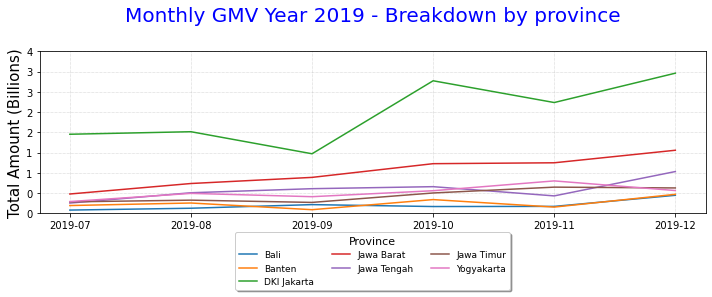

In [12]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by province',loc = 'center',pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel ('Total Amount (Billions)',fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5, -0.5), shadow = True,ncol=3, title = 'Province', fontsize = 9, title_fontsize = 11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


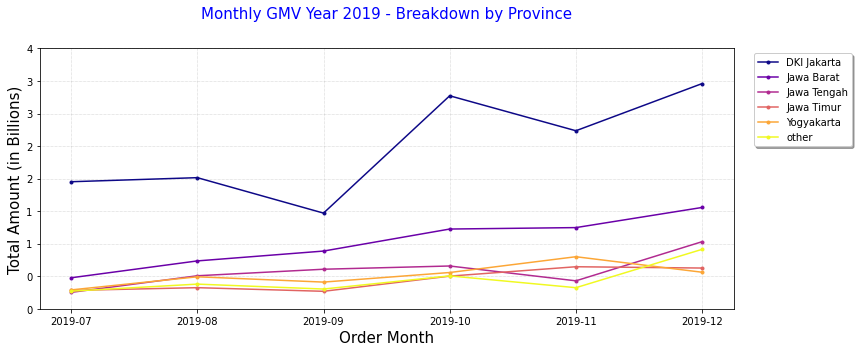

In [13]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
#tampilkan 5 top tertinggi
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby(['province'])['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by = 'gmv',ascending = False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x : x if(x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker = '.',cmap = 'plasma')
													
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc = 'center',pad = 30, fontsize = 15, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center',bbox_to_anchor=(1.1,1),shadow=True ,ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()
